# Project: Investigating TMDb movie data

--------------

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

--------------

<a id='intro'></a>
## Introduction

This data set contains information of about 10,000 movies. It includes information such as budget, revenue, cast, director, ratings and revenue. The data is from The Movie Database (TMDb).

This report will analyze this data focusing on the performance of movies to uncover answers to the following questions:

**Q1. How is the performance of a movie influenced by it's genre?**

**Q2. How is the performance of a movie influenced by it's runtime?**

In [104]:
# Import required libraries to perform the analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

--------------

<a id='wrangling'></a>
## Data Wrangling

This section of the report will detail steps taken to understand and clean the data to prepare for analysis.

### General Properties

The following are steps taken to understand the data, it's properties and any problems with the data:

- visually check first few records of the data
- check the data types, sizes and missing values
- check for duplicates
- check for outliers

In [105]:
# Load the movie data set and check the first few records

df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [106]:
# Check the datatypes, size and missing values

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [107]:
# Check for duplicate rows

sum(df_movies.duplicated())

1

In [108]:
# Check for outliers

df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observations and Cleaning Suggestions

1. **Unnecessary Attributes** - Based on the questions being answered in this report there are many attributes in this dataset that are not necessary. These are `id`, `imdb_id`, `budget`, `revenue`, `original_title`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `production_companies`, `vote_count`, `release_date`, and `release_year`. These attributed can be removed for analysis.


2. **Missing Values** - From the relevant attributes, the `genres` attribute is missing some data. Relevant attributes are the ones not present in the unnecessary attributes list above. Records with missing data can be removed for analysis.


3. **Duplicate Row** - There is one duplicate row that can be removed.


4. **Outliers** - For the `runtime`, `revenue_adj` and `budget_adj` attributes, the minimum value of 0 can be considered outliers and removed.


5. **Profit attribute** - To answer the questions, we are also interested in the profit that each movie makes. Assuming that the entire budget of the movies are used up, we can calculate profit into a new attribute based on the attributes `budget_adj` and `revenue_adj`. After calculating the profit, we can safely remove the `budget_adj` and `revenue_adj` attributes.


6. **Genre attribute** - The data types of the relevant attributes are clean. However, the values of `genres` are organized in a way that's hard to analyze. To clean it up, a new dataframe can be created, where the `genre` attribute only has 1 value per row.


### Data Cleaning Based on Obersations

The steps below performs the data cleaning based on the problems observed.

In [109]:
# 1. Remove unnecessary attributes and check

df_movies = df_movies.drop(columns=['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'release_date', 'release_year'])
df_movies.head()

,popularity,runtime,genres,vote_average,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09


In [110]:
# 2. Remove rows with missing values and check

df_movies = df_movies.dropna()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10843 non-null float64
runtime         10843 non-null int64
genres          10843 non-null object
vote_average    10843 non-null float64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 593.0+ KB


In [111]:
# 3. Remove duplicate row and check

df_movies = df_movies.drop_duplicates()
sum(df_movies.duplicated())

0

In [113]:
# 4. Remove outliers for runtime, revenue_adj and budget_adj where the values are 0 and check

df_movies = df_movies[(df_movies['runtime'] > 0)]
df_movies = df_movies[(df_movies['budget_adj'] > 0)]
df_movies = df_movies[(df_movies['revenue_adj'] > 0)]

df_movies.describe()

,popularity,runtime,vote_average,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,19.922820,0.794920,4.480925e+07,2.161114e+08
min,0.001117,15.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,8.400000,4.250000e+08,2.827124e+09


In [114]:
# 5. Create 'profit' attribute in millions from revenue and budget and remove the budget and revenue attribute.

df_movies['profit_adj'] = ((df_movies['revenue_adj'] - df_movies['budget_adj']))/1e6
df_movies = df_movies.drop(columns={'budget_adj', 'revenue_adj'})
df_movies.head()

,popularity,runtime,genres,vote_average,profit_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,1254.445953
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,210.161353
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,170.419070
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,1718.723211
4,9.335014,137,Action|Crime|Thriller,7.3,1210.948878


In [115]:
# 6. Create a new dataframes for genres where there is only 1 genre per row

df_genres = df_movies.drop(columns={'runtime'})

# FUNCTION REFERENCE: https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df,target_column,separator):
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

df_genres = splitDataFrameList(df_genres,'genres','|')
df_genres = df_genres[['genres', 'popularity', 'vote_average', 'profit_adj']]
df_genres.head(10)

,genres,popularity,vote_average,profit_adj
0,Action,32.985763,6.5,1254.445953
1,Adventure,32.985763,6.5,1254.445953
2,Science Fiction,32.985763,6.5,1254.445953
3,Thriller,32.985763,6.5,1254.445953
4,Action,28.419936,7.1,210.161353
5,Adventure,28.419936,7.1,210.161353
6,Science Fiction,28.419936,7.1,210.161353
7,Thriller,28.419936,7.1,210.161353
8,Adventure,13.112507,6.3,170.419070
9,Science Fiction,13.112507,6.3,170.419070


In [116]:
# 7. Remove genres in the original dataframe and organise the columns for easy analysis

df_movies = df_movies.drop(columns={'genres'})
df_movies = df_movies[['runtime', 'popularity', 'vote_average', 'profit_adj']]
df_movies.head(10)

,runtime,popularity,vote_average,profit_adj
0,124,32.985763,6.5,1254.445953
1,120,28.419936,7.1,210.161353
2,119,13.112507,6.3,170.419070
3,136,11.173104,7.5,1718.723211
4,137,9.335014,7.3,1210.948878
5,156,9.110700,7.2,366.114302
6,125,8.654359,5.8,262.755138
7,141,7.667400,7.6,448.389698
8,91,7.404165,6.5,996.112047
9,94,6.326804,8.0,624.411646


#### Cleansing Conclusion

We now have two dataframes ready to be explored and analyzed. All irrelevant attributes have been removed, rows with missing values, outliers and duplicate rows removed and the profit attribute have been created in units of millions.

The first dataframe is `df_genres`. This will be used to answer the first question. It is formatted with only one genre per row with all the assumed relevant metrics that may be used to judge a movie's performance.

The second dataframe is `df_movies`. This will be used to answer the second question. It's attributes are `runtime` along with the assumed relevant attributes to judge a movie's performance.

Relevant attributes to judge a movie's performance are assumed to be `popularity`, `vote_average`, and `profit_adj`.

--------------

<a id='eda'></a>
## Exploratory Data Analysis

This section explores and analyzes the data to answer the questions that were set in the introduction.

### Q1. How is the performance of the movie influenced by it's genre?

Before we get into the performance metrics, let's explore the distribution of genres within the dataset with a bar chart.

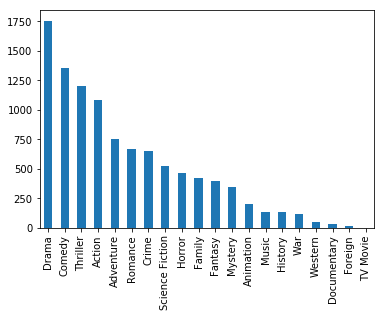

In [117]:
# Plot a bar chart showing the distribution of genres in the dataset
df_genres['genres'].value_counts().plot(kind='bar');

Looking at the bar chart above, it is clear that the sample sizes for each genre varies significantly. This is important to note as it may affect the results of this analysis.

To answer this question we are going to explore multiple variables that may be judged for the movie's performance. These are assumed to be `popularity`, `vote_average` and `profit_adj`.

In [118]:
# Calculate the mean performance metrics for each genre

genre_performance = df_genres.groupby('genres').mean()
print(genre_performance)

                 popularity  vote_average  profit_adj
genres                                               
Action             1.567116      6.036959  128.945315
Adventure          1.867693      6.124433  190.151743
Animation          1.710622      6.380597  207.485229
Comedy             1.012321      6.026436   82.132064
Crime              1.123961      6.300614   70.485067
Documentary        0.294458      6.660000   19.426464
Drama              1.001411      6.396754   66.666003
Family             1.459043      6.127059  172.690036
Fantasy            1.754315      6.062879  169.755235
Foreign            0.179608      6.123077   -0.164464
History            0.970674      6.578295   64.781876
Horror             0.854005      5.710799   58.165843
Music              0.899005      6.315441   99.368001
Mystery            1.142613      6.194767   71.258378
Romance            0.954889      6.189955   79.615540
Science Fiction    1.873294      6.029287  136.535918
TV Movie           0.273628 

Now that we have some statistics of each of the performance metrics for each genre. To compare them on the same scale, we'll normalize the data.

In [119]:
# Normilize genre performance metrics

def normalize(df):
    n_df = (df - df.min()) / (df.max() - df.min())
    return n_df

n_genre_performance = normalize(genre_performance)
print(n_genre_performance)

                 popularity  vote_average  profit_adj
genres                                               
Action             0.819224      0.412225    0.621767
Adventure          0.996693      0.494748    0.916525
Animation          0.903954      0.736412    1.000000
Comedy             0.491657      0.402298    0.396324
Crime              0.557573      0.660957    0.340234
Documentary        0.067810      1.000000    0.094346
Drama              0.485216      0.751655    0.321842
Family             0.755415      0.497225    0.832433
Fantasy            0.929751      0.436678    0.818300
Foreign            0.000000      0.493469    0.000000
History            0.467068      0.922919    0.312769
Horror             0.398183      0.104527    0.280907
Music              0.424752      0.674945    0.479329
Mystery            0.568585      0.561101    0.343958
Romance            0.457748      0.556561    0.384205
Science Fiction    1.000000      0.404988    0.658322
TV Movie           0.055512 

Let's plot this data on a chart to see how each genre performs on each metric visually. Assuming profit is the most important performance metric, we'll sort the data by profit.

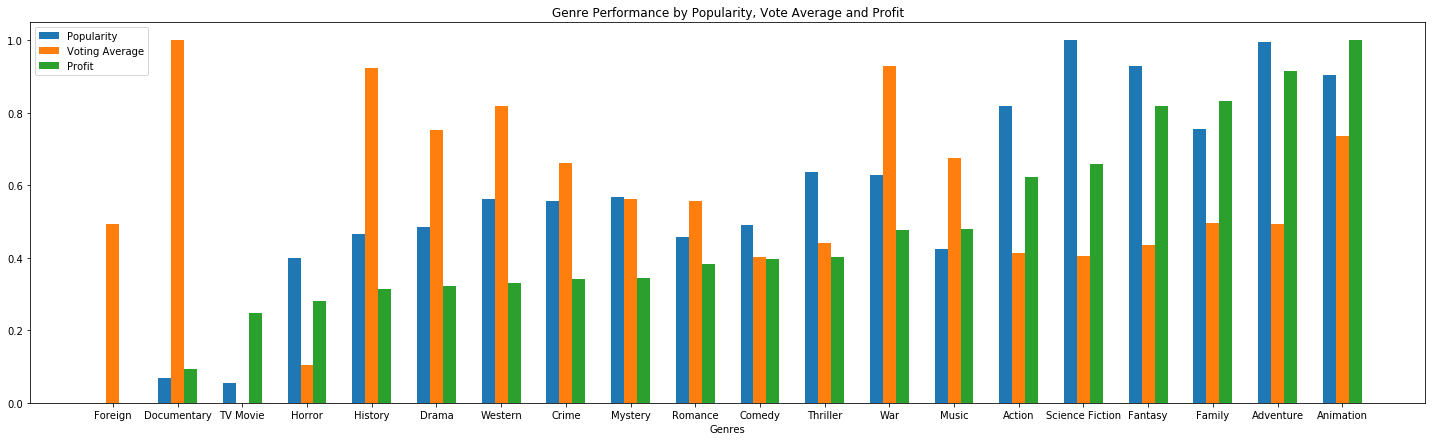

In [120]:
# Create a plot of the data above on the same plot.

n_genre_performance = n_genre_performance.sort_values(by='profit_adj')
ind_labels = n_genre_performance.index.values
ind = np.arange(len(ind_labels))
bar_width = 0.2
n_genre_performance.reindex(ind_labels)

popular_performance = n_genre_performance['popularity']
vote_performance = n_genre_performance['vote_average']
profit_performance = n_genre_performance['profit_adj']

plt.figure(figsize=(25,7));
plt.bar(ind-bar_width, popular_performance, bar_width, label="Popularity");
plt.bar(ind, vote_performance, bar_width, label="Voting Average");
plt.bar(ind+bar_width, profit_performance, bar_width, label="Profit");

plt.title("Genre Performance by Popularity, Vote Average and Profit");
plt.xlabel("Genres");
plt.xticks(ind, ind_labels);
plt.legend();

Looking at the chart above, there is somewhat a positive correlation between popularity and profit. Let's explore this further with a scatter plot between these variables.

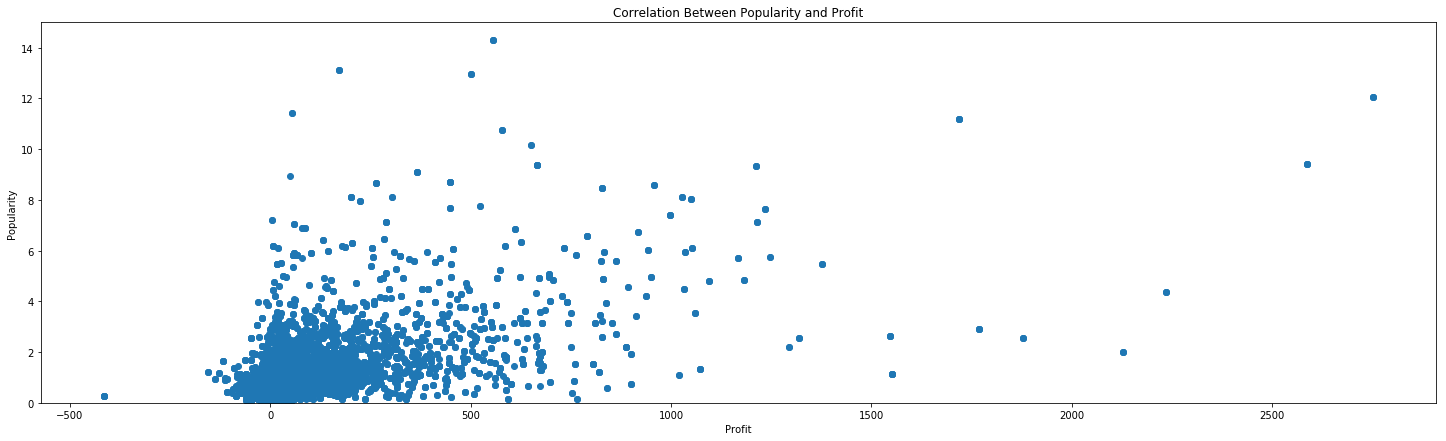

In [121]:
# Plot a scatter plot between popularity and profit

plt.figure(figsize=(25,7));
plt.scatter(df_genres['profit_adj'], df_genres['popularity']);

plt.title("Correlation Between Popularity and Profit");
plt.xlabel("Profit");
plt.ylabel("Popularity");
plt.ylim(0, 15);

Looking at the scatter plot above, we can see that popularity is positively correlated with profit. With this knowledge, we'll answer this question in 2 parts. The first part is how performance measured in popularity and profit is influenced by genre and the second part is how performance measured in voting average is influenced by genre. 

To answer the first part, we'll combine popularity and profit and plot a chart showing the genre influence. We'll combine these 2 metrics by adding them together and normalizing them.

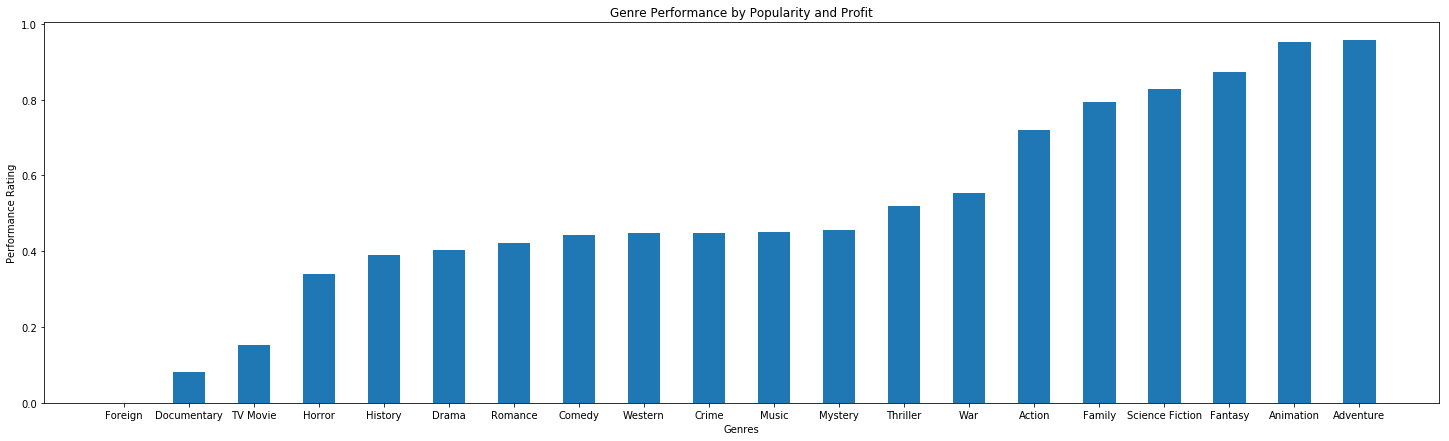

In [122]:
# Combine and normalize profit and popularity

n_genre_performance['pop_profit'] = (n_genre_performance['popularity'] + n_genre_performance['profit_adj'])/2

n_genre_performance = n_genre_performance.sort_values(by='pop_profit')
ind_labels = n_genre_performance.index.values
ind = np.arange(len(ind_labels))
bar_width = 0.5
n_genre_performance.reindex(ind_labels)

performance = n_genre_performance['pop_profit']

plt.figure(figsize=(25,7));
plt.bar(ind, performance, bar_width);

plt.title("Genre Performance by Popularity and Profit");
plt.xlabel("Genres");
plt.xticks(ind, ind_labels);
plt.ylabel("Performance Rating");

#### Genre performance rating measured by popularity and profit:
From the chart above, performance based on popularity and profit may be influenced by genre. The `adventure` genre has a tendency to perform best, while the `foreign` genre has a tendency to perform worst when measured on popularity and profit.

Now let's look at genre performance by voting average:

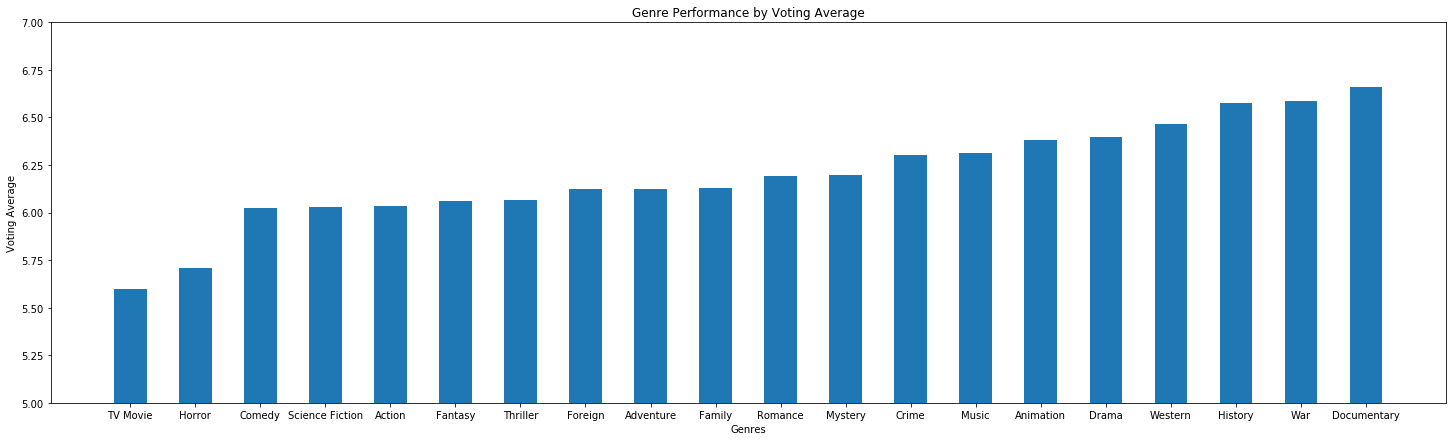

In [123]:
# Plot genre performance by voting average

genre_performance = genre_performance.sort_values(by='vote_average')
ind_labels = genre_performance.index.values
ind = np.arange(len(ind_labels))
bar_width = 0.5
genre_performance.reindex(ind_labels)

performance = genre_performance['vote_average'].tolist()

plt.figure(figsize=(25,7));
plt.bar(ind, performance, bar_width);

plt.title("Genre Performance by Voting Average");
plt.xlabel("Genres");
plt.xticks(ind, ind_labels);
plt.ylabel("Voting Average");
plt.ylim(5,7);

#### Genre performance rating measured by vote average:
From the chart above, performance based on voting average/rating may be influenced by genre. The `documentary`genre has a tendency to perform best, while the `TV Movie` genre has a tendency to perform worst when measured on voting average/rating. Interestingly, the `documentary`genre is one of lowest performing ones when measured by profit and popularity.

### Q2. How is the performance of the movie influenced by it's runtime?

Before jumping into this questions, we will look at the distribution of the runtime data with a histogram and box plot.

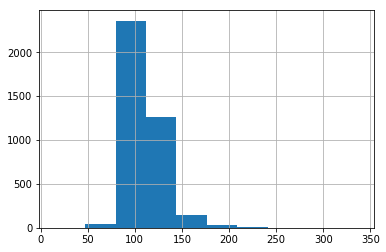

In [124]:
# Plot a histogram of the runtime data
df_movies['runtime'].hist();

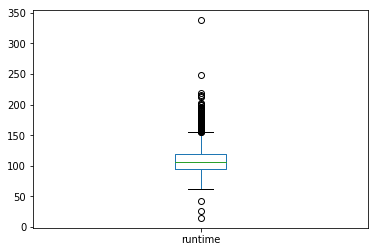

In [125]:
# Plot a boxplot of the runtime data
df_movies['runtime'].plot(kind="box");

Looking at the charts above, we see quite a few outliers. Otherwise, `runtime` looks to be normally distributed.

Since this question also looks at performance, we will answer this in 2 parts similarly to the last question. The first part will look at performance based on profit and popularity and the second will look performance based on voting average.

#### Runtime performance rating measured by popularity and profit:

We'll start by normalizing the runtime performance metrics. Then, we'll compute the performance rating based on popularity and profit and plot a chart showing the data.

In [126]:
# Normalize the runtime performance metrics and check

n_runtime_performance = normalize(df_movies)
n_runtime_performance['runtime'] = df_movies['runtime']
n_runtime_performance.head()

,runtime,popularity,vote_average,profit_adj
0,124,1.000000,0.693548,0.527286
1,120,0.861577,0.790323,0.197239
2,119,0.397500,0.661290,0.184678
3,136,0.338703,0.854839,0.674021
4,137,0.282977,0.822581,0.513539


In [127]:
# Compute runtime performance rating based on popularity and profit

n_runtime_performance['pop_profit'] = (n_runtime_performance['popularity'] + n_runtime_performance['profit_adj'])/2
n_runtime_performance.head()

,runtime,popularity,vote_average,profit_adj,pop_profit
0,124,1.000000,0.693548,0.527286,0.763643
1,120,0.861577,0.790323,0.197239,0.529408
2,119,0.397500,0.661290,0.184678,0.291089
3,136,0.338703,0.854839,0.674021,0.506362
4,137,0.282977,0.822581,0.513539,0.398258


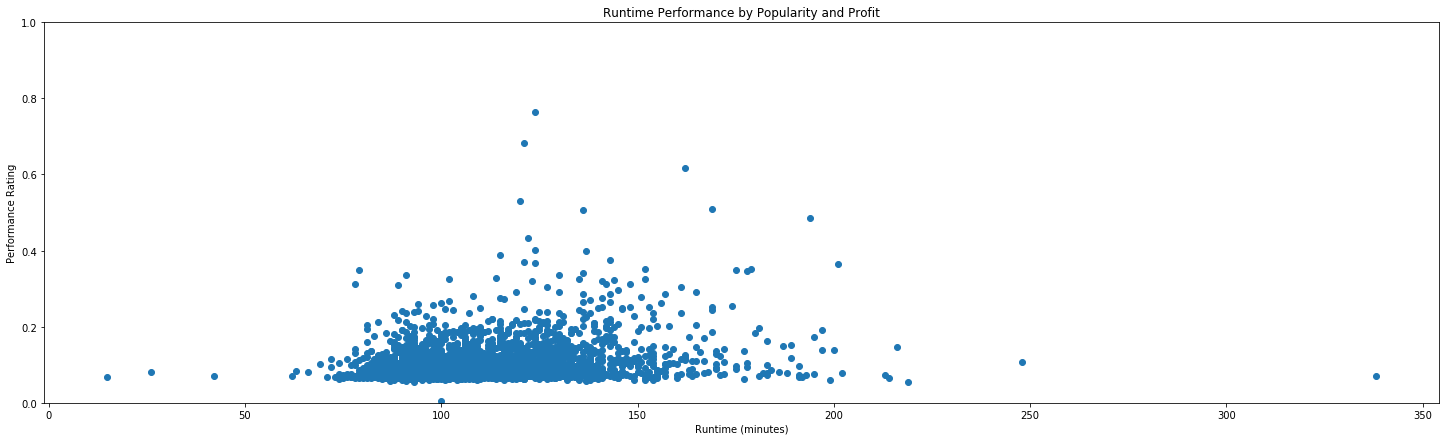

In [128]:
# Plot a chart to show the runtime performance rating by popularity and profit

plt.figure(figsize=(25,7));
plt.scatter(n_runtime_performance['runtime'], n_runtime_performance['pop_profit']);

plt.title("Runtime Performance by Popularity and Profit");
plt.xlabel("Runtime (minutes)");
plt.ylabel("Performance Rating");
plt.ylim(0, 1);

To see how the runtime influences performance, we'll calculate the average runtime of movies that have performed better than average.

In [129]:
mean_performance = n_runtime_performance['pop_profit'].mean()
(n_runtime_performance[(n_runtime_performance['pop_profit'] > mean_performance)])['runtime'].mean()

115.55887372013652

From the results, we can see that the average runtime for movies that perform better than average is ~116 minutes (1 hour and 56 minutes).

#### Runtime performance rating measured by voting average:

Since we already have the normalized data, to analyze the runtime performance by voting average we'll plot a chart.  

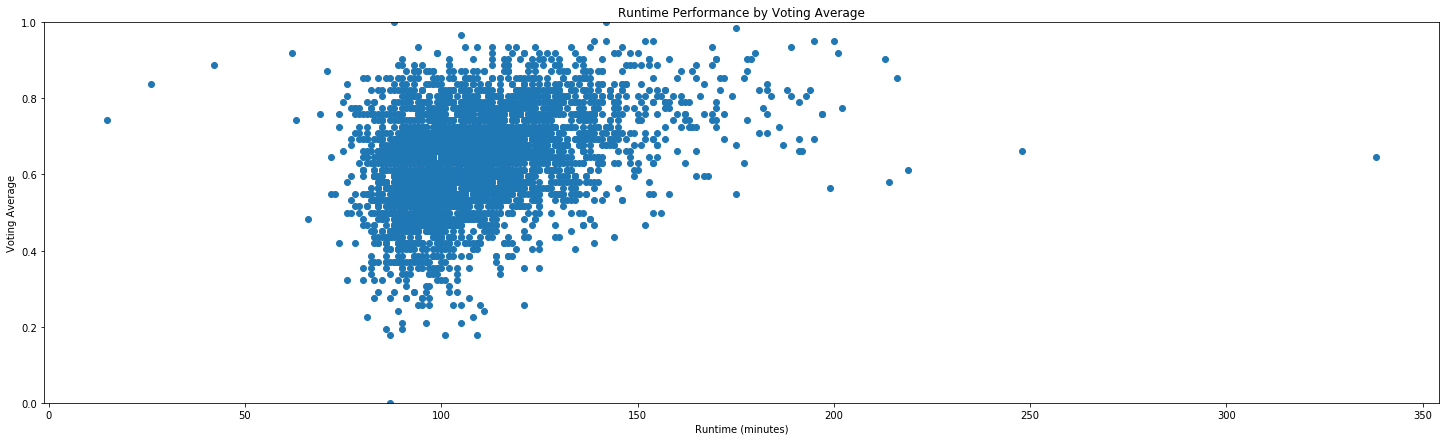

In [130]:
# Plot a chart to show the runtime performance rating by voting average

plt.figure(figsize=(25,7));
plt.scatter(n_runtime_performance['runtime'], n_runtime_performance['vote_average']);

plt.title("Runtime Performance by Voting Average");
plt.xlabel("Runtime (minutes)");
plt.ylabel("Voting Average");
plt.ylim(0, 1);

To see how the runtime influences voting average performance, we'll calculate the average runtime of movies that have performed better than average based on voting average.

In [131]:
mean_vote = n_runtime_performance['vote_average'].mean()
(n_runtime_performance[(n_runtime_performance['vote_average'] > mean_vote)])['runtime'].mean()

114.43638170974155

From the results, we can see that the average runtime for movies that perform better than average based on the voting average is ~114 minutes (1 hour and 54 minutes). This is interesting because the number is also similar when performance is measured by profit and popularity.

-----

<a id='conclusions'></a>
## Conclusions

We looked into the TMDb movie data to explore the influence genre and running time to the performance of movies.
From the dataset, the attributes assumed to be relevant with regards to performance were profit, popularity and movie rating.

While analyzing the data, we split our analysis into two parts. Because of their positive correlation, the first part focused on performance by profit and popularity. The second part focused on performance by voting average.

### Part 1: Performance by Profit and Popularity

**Q1. How is the performance of the movie influenced by it's genre?**

Some genres have the tendency to perform better than others. Specifically, the `Adventure` genre has the tedency to perform best, while the `Foreign` genre has the tendency to perform worst when performance is measured by profit and popularity.

**Q2. How is the performance of the movie influenced by it's running time?**

From the data, movies that have a runtime of approximately 1 hour and 56 minutes tend to perform the best when performance is measured by profit and popularity.

### Part 2: Performance by Voting Average

**Q1. How is the performance of the movie influenced by it's genre?**

Some genres have the tendency to perform better than others. Specifically, the `Documentary` genre has the tedency to perform best, while the `TV Movie` genre has the tendency to perform worst when performance is measured by voting average.

**Q2. How is the performance of the movie influenced by it's running time?**

From the data, movies that have a runtime of approximately 1 hour and 54 minutes tend to perform the best. This is interesting because it seems that regardless of the performance metrics used, the optimal runtime remains similar.

### Limitations

The dataset analyzed here has a few limitations that may cause the presented conclusions to be inaccurate. These limitations include:

- **Runtime, Budget and Revenue Outliers** - the number of outliers in this dataset is significant. Specifically, this is referring to the number of movies listed with a budget, revenue or runtime as 0. Since these outliers have been removed, it may mean that the results are more biased to the remaining sample.


- **Vote Counts** - some of the listed movies have quite low number of vote counts. Because of the low number of vote counts, the voting average may not be as accurate as it should be. In this case, since we are looking at performance by voting average as well as others, it could have affected our results.


- **Genre Sample Sizes** - The dataset had a good spread of different genres but the number of movies in each genre was very inconsistent. For this reason, when measuring performance by genre, the results may be inaccurate for some genres. In particular, genres with very small sample sizes such as TV Movie, Foreign and Documentaries.


- **Profit Data** - Even though with some assumptions, we were able to calculate the profit each movie made, having the actual profit could significantly effect the results of the analysis.

*It is important to note that these results are only a tendency based on this data. It may not always hold true.*

--------